In [103]:
import pandas as pd

# Cargar datos de clientes y productos
clientes_df = pd.read_csv('clientes.csv')
productos_df = pd.read_csv('productos.csv')

# Verificar que la columna 'region' existe en clientes_df
print(clientes_df.head())


   cliente_id nombre_cliente      pais    industria fecha_registro
0           1      Cliente_1    Brasil     Finanzas     2020-10-05
1           2      Cliente_2  Alemania  Manufactura     2015-06-29
2           3      Cliente_3     Japón        Salud     2015-08-20
3           4      Cliente_4     Japón     Finanzas     2020-04-01
4           5      Cliente_5    Brasil   Tecnología     2015-12-09


In [120]:
import numpy as np
from datetime import datetime, timedelta

# Generar datos de ventas simulados
np.random.seed(42)
num_ventas = 1000
producto_ids = range(1, 51)
cliente_ids = clientes_df['cliente_id'].tolist()
fechas_ventas = [datetime(2023, 1, 1) + timedelta(days=np.random.randint(0, 365)) for _ in range(num_ventas)]

ventas_df = pd.DataFrame({
    'venta_id': range(1, num_ventas + 1),
    'producto_id': np.random.choice(producto_ids, num_ventas),
    'cliente_id': np.random.choice(cliente_ids, num_ventas),
    'fecha_venta': fechas_ventas,
    'cantidad_venta': np.random.randint(1, 10, num_ventas),
    'precio_unitario': np.random.uniform(10, 1000, num_ventas).round(2)
})

ventas_df['revenue'] = ventas_df['cantidad_venta'] * ventas_df['precio_unitario']
print(ventas_df.head())


   venta_id  producto_id  cliente_id fecha_venta  cantidad_venta  \
0         1           43         189  2023-04-13               3   
1         2            3          93  2023-12-15               5   
2         3           33         182  2023-09-28               5   
3         4            6         191  2023-04-17               4   
4         5           50          97  2023-03-13               1   

   precio_unitario  revenue  
0            67.13   201.39  
1           449.92  2249.60  
2           282.79  1413.95  
3           625.82  2503.28  
4           992.52   992.52  


In [137]:
# Unir datos de productos y clientes
ventas_con_productos_clientes = ventas_df.merge(productos_df, on='producto_id').merge(clientes_df, on='cliente_id')

# Verificar que la columna 'region' existe después de la unión
print(ventas_con_productos_clientes.head())


   venta_id  producto_id  cliente_id fecha_venta  cantidad_venta  \
0         1           39         121  2023-05-03              10   
1         2           29          33  2023-01-09              16   
2         3           15         181  2023-09-19              16   
3         4           43         150  2023-03-14              10   
4         5            8          21  2023-12-25              13   

   precio_unitario        region  revenue nombre_producto    categoria  \
0           227.74          Asia  2277.40     Producto_39    Servicios   
1           145.02        Europa  2320.32     Producto_29     Software   
2           314.80        Europa  5036.80     Producto_15  Electrónica   
3           496.30    Sudamérica  4963.00     Producto_43  Electrónica   
4           199.30  Norteamérica  2590.90      Producto_8     Hardware   

   precio_base  stock nombre_cliente            pais    industria  \
0       239.52    494    Cliente_121        Alemania        Salud   
1       

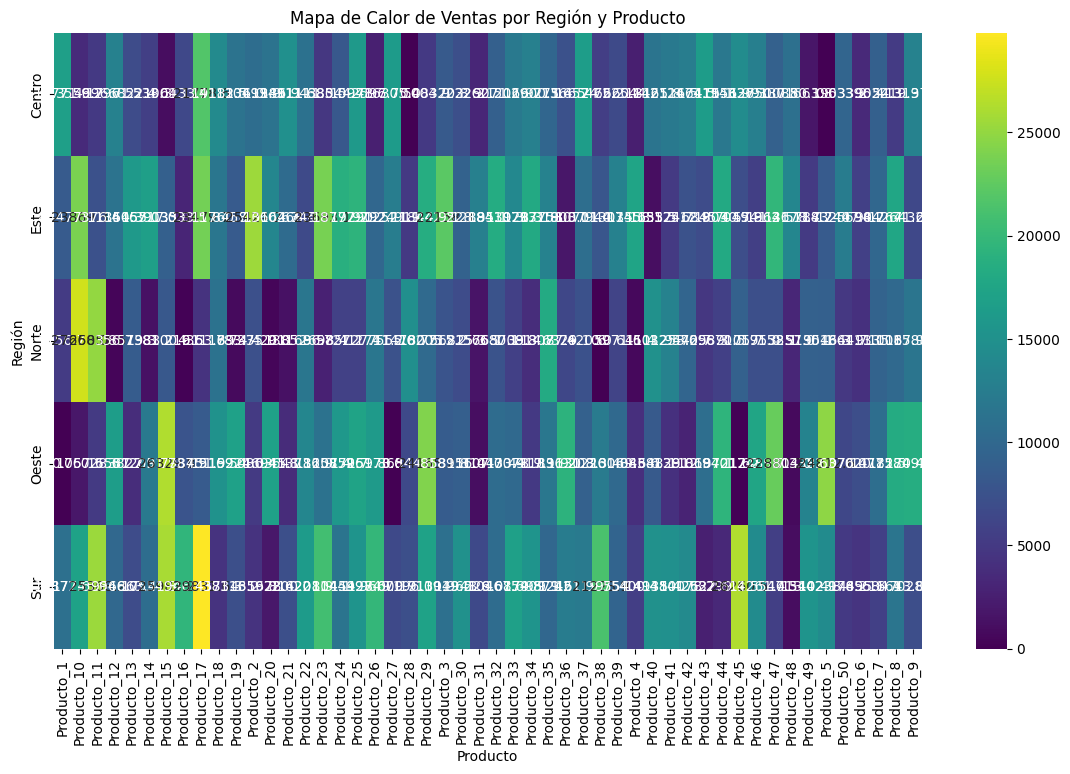

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar ingresos por región y producto
try:
    ingresos_por_region_producto = ventas_con_productos_clientes.groupby(['region', 'nombre_producto'])['revenue'].sum().unstack().fillna(0)

    # Graficar mapa de calor
    plt.figure(figsize=(14, 8))
    sns.heatmap(ingresos_por_region_producto, cmap='viridis', annot=True, fmt='.1f')
    plt.title('Mapa de Calor de Ventas por Región y Producto')
    plt.xlabel('Producto')
    plt.ylabel('Región')
    plt.show()
except KeyError as e:
    print(f"Error: {e}. Asegúrate de que la columna 'region' existe en los datos unidos.")


In [171]:
print(clientes_df.head())


   cliente_id nombre_cliente      pais    industria fecha_registro
0           1      Cliente_1    Brasil     Finanzas     2020-10-05
1           2      Cliente_2  Alemania  Manufactura     2015-06-29
2           3      Cliente_3     Japón        Salud     2015-08-20
3           4      Cliente_4     Japón     Finanzas     2020-04-01
4           5      Cliente_5    Brasil   Tecnología     2015-12-09


In [188]:
print(ventas_con_productos_clientes.head())
print(ventas_con_productos_clientes.columns)


   venta_id  producto_id  cliente_id fecha_venta  cantidad_venta  \
0         1           43         189  2023-04-13               3   
1         2            3          93  2023-12-15               5   
2         3           33         182  2023-09-28               5   
3         4            6         191  2023-04-17               4   
4         5           50          97  2023-03-13               1   

   precio_unitario  revenue nombre_producto    categoria  precio_base  stock  \
0            67.13   201.39     Producto_43  Electrónica        82.27    363   
1           449.92  2249.60      Producto_3  Electrónica       421.70    472   
2           282.79  1413.95     Producto_33     Software       288.58    263   
3           625.82  2503.28      Producto_6  Electrónica       479.27     13   
4           992.52   992.52     Producto_50    Servicios       240.31    431   

  nombre_cliente       pais    industria fecha_registro  region  
0    Cliente_189      Japón    Educación    

In [189]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generar datos de ejemplo
np.random.seed(42)

# Parámetros
num_ventas = 1000
num_productos = 50
num_clientes = 200
regiones = ['Norteamérica', 'Europa', 'Asia', 'Sudamérica', 'África']

# Crear DataFrame
ventas = pd.DataFrame({
    'venta_id': range(1, num_ventas + 1),
    'producto_id': np.random.randint(1, num_productos + 1, size=num_ventas),
    'cliente_id': np.random.randint(1, num_clientes + 1, size=num_ventas),
    'fecha_venta': [datetime(2023, 1, 1) + timedelta(days=np.random.randint(0, 365)) for _ in range(num_ventas)],
    'cantidad_venta': np.random.randint(1, 20, size=num_ventas),
    'precio_unitario': np.random.uniform(10, 500, size=num_ventas).round(2),
    'region': np.random.choice(regiones, size=num_ventas)
})

# Calcular revenue
ventas['revenue'] = (ventas['cantidad_venta'] * ventas['precio_unitario']).round(2)

# Guardar a CSV
ventas.to_csv('ventas.csv', index=False)

print("Archivo 'ventas.csv' creado con éxito.")


Archivo 'ventas.csv' creado con éxito.


In [190]:
import pandas as pd

# Cargar datos de clientes y productos
clientes_df = pd.read_csv('clientes.csv')
productos_df = pd.read_csv('productos.csv')

# Mostrar algunos datos para verificar
print(clientes_df.head())
print(productos_df.head())


   cliente_id nombre_cliente      pais    industria fecha_registro
0           1      Cliente_1    Brasil     Finanzas     2020-10-05
1           2      Cliente_2  Alemania  Manufactura     2015-06-29
2           3      Cliente_3     Japón        Salud     2015-08-20
3           4      Cliente_4     Japón     Finanzas     2020-04-01
4           5      Cliente_5    Brasil   Tecnología     2015-12-09
   producto_id nombre_producto    categoria  precio_base  stock
0            1      Producto_1    Servicios        42.94    370
1            2      Producto_2     Hardware       130.67    362
2            3      Producto_3  Electrónica       421.70    472
3            4      Producto_4     Hardware        72.50     56
4            5      Producto_5   Accesorios       402.79    113


In [191]:
import numpy as np
from datetime import datetime, timedelta

# Generar datos de ventas simulados
np.random.seed(42)
num_ventas = 1000
producto_ids = range(1, 51)
cliente_ids = clientes_df['cliente_id'].tolist()
fechas_ventas = [datetime(2023, 1, 1) + timedelta(days=np.random.randint(0, 365)) for _ in range(num_ventas)]

# Datos originales de ventas
ventas_df = pd.DataFrame({
    'venta_id': range(1, num_ventas + 1),
    'producto_id': np.random.choice(producto_ids, num_ventas),
    'cliente_id': np.random.choice(cliente_ids, num_ventas),
    'fecha_venta': fechas_ventas,
    'cantidad_venta': np.random.randint(1, 10, num_ventas),
    'precio_unitario': np.random.uniform(10, 1000, num_ventas).round(2)
})

# Añadir columna de ingresos
ventas_df['revenue'] = ventas_df['cantidad_venta'] * ventas_df['precio_unitario']

# Mostrar algunas filas para verificar
print(ventas_df.head())


   venta_id  producto_id  cliente_id fecha_venta  cantidad_venta  \
0         1           43         189  2023-04-13               3   
1         2            3          93  2023-12-15               5   
2         3           33         182  2023-09-28               5   
3         4            6         191  2023-04-17               4   
4         5           50          97  2023-03-13               1   

   precio_unitario  revenue  
0            67.13   201.39  
1           449.92  2249.60  
2           282.79  1413.95  
3           625.82  2503.28  
4           992.52   992.52  


In [192]:
# Asegurarse de que los datos de clientes tienen la columna 'region'
if 'region' not in clientes_df.columns:
    # Si la columna 'region' no existe, añadirla con valores por defecto o generados
    regiones = ['Norte', 'Sur', 'Este', 'Oeste', 'Centro']
    clientes_df['region'] = np.random.choice(regiones, len(clientes_df))

# Unir datos de productos y clientes
ventas_con_productos_clientes = ventas_df.merge(productos_df, on='producto_id').merge(clientes_df, on='cliente_id')

# Mostrar algunas filas para verificar
print(ventas_con_productos_clientes.head())


   venta_id  producto_id  cliente_id fecha_venta  cantidad_venta  \
0         1           43         189  2023-04-13               3   
1         2            3          93  2023-12-15               5   
2         3           33         182  2023-09-28               5   
3         4            6         191  2023-04-17               4   
4         5           50          97  2023-03-13               1   

   precio_unitario  revenue nombre_producto    categoria  precio_base  stock  \
0            67.13   201.39     Producto_43  Electrónica        82.27    363   
1           449.92  2249.60      Producto_3  Electrónica       421.70    472   
2           282.79  1413.95     Producto_33     Software       288.58    263   
3           625.82  2503.28      Producto_6  Electrónica       479.27     13   
4           992.52   992.52     Producto_50    Servicios       240.31    431   

  nombre_cliente       pais    industria fecha_registro  region  
0    Cliente_189      Japón    Educación    

In [237]:
import pandas as pd

# Assuming you have a CSV file named 'ventas.csv' with your sales data
ventas_merged = pd.read_csv('ventas.csv')

In [238]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generar datos de ejemplo
np.random.seed(42)

# Parámetros
num_ventas = 1000
num_productos = 50
num_clientes = 200
regiones = ['Norteamérica', 'Europa', 'Asia', 'Sudamérica', 'África']

# Crear DataFrame
ventas = pd.DataFrame({
    'venta_id': range(1, num_ventas + 1),
    'producto_id': np.random.randint(1, num_productos + 1, size=num_ventas),
    'cliente_id': np.random.randint(1, num_clientes + 1, size=num_ventas),
    'fecha_venta': [datetime(2023, 1, 1) + timedelta(days=np.random.randint(0, 365)) for _ in range(num_ventas)],
    'cantidad_venta': np.random.randint(1, 20, size=num_ventas),
    'precio_unitario': np.random.uniform(10, 500, size=num_ventas).round(2),
    'region': np.random.choice(regiones, size=num_ventas)
})

# Calcular revenue
ventas['revenue'] = (ventas['cantidad_venta'] * ventas['precio_unitario']).round(2)

# Guardar a CSV
ventas.to_csv('ventas.csv', index=False)

print("Archivo 'ventas.csv' creado con éxito.")


Archivo 'ventas.csv' creado con éxito.


In [239]:
import pandas as pd

# Cargar los datos
ventas_df = pd.read_csv('ventas.csv')

# Mostrar las primeras filas del DataFrame
print(ventas_df.head())


   venta_id  producto_id  cliente_id fecha_venta  cantidad_venta  \
0         1           39         121  2023-05-03              10   
1         2           29          33  2023-01-09              16   
2         3           15         181  2023-09-19              16   
3         4           43         150  2023-03-14              10   
4         5            8          21  2023-12-25              13   

   precio_unitario        region  revenue  
0           227.74          Asia  2277.40  
1           145.02        Europa  2320.32  
2           314.80        Europa  5036.80  
3           496.30    Sudamérica  4963.00  
4           199.30  Norteamérica  2590.90  


In [240]:
import pandas as pd
import numpy as np

# Parámetros
num_productos = 50
categorias = ['Electrónica', 'Software', 'Hardware', 'Accesorios', 'Servicios']

# Crear DataFrame de productos
productos = pd.DataFrame({
    'producto_id': range(1, num_productos + 1),
    'nombre_producto': [f'Producto_{i}' for i in range(1, num_productos + 1)],
    'categoria': np.random.choice(categorias, size=num_productos),
    'precio_base': np.random.uniform(10, 1000, size=num_productos).round(2),
    'stock': np.random.randint(1, 500, size=num_productos)
})

# Guardar a CSV
productos.to_csv('productos.csv', index=False)

print("Archivo 'productos.csv' creado con éxito.")


Archivo 'productos.csv' creado con éxito.


In [241]:
from datetime import datetime, timedelta

# Parámetros
num_clientes = 200
paises = ['Estados Unidos', 'Alemania', 'Japón', 'Brasil', 'Sudáfrica']
industrias = ['Tecnología', 'Finanzas', 'Salud', 'Educación', 'Manufactura']

# Crear DataFrame de clientes
clientes = pd.DataFrame({
    'cliente_id': range(1, num_clientes + 1),
    'nombre_cliente': [f'Cliente_{i}' for i in range(1, num_clientes + 1)],
    'pais': np.random.choice(paises, size=num_clientes),
    'industria': np.random.choice(industrias, size=num_clientes),
    'fecha_registro': [datetime(2015, 1, 1) + timedelta(days=np.random.randint(0, 365*9)) for _ in range(num_clientes)]
})

# Guardar a CSV
clientes.to_csv('clientes.csv', index=False)

print("Archivo 'clientes.csv' creado con éxito.")


Archivo 'clientes.csv' creado con éxito.


In [242]:
# Cargar los datos de productos
productos_df = pd.read_csv('productos.csv')

# Mostrar las primeras filas del DataFrame de productos
print(productos_df.head())

# Cargar los datos de clientes
clientes_df = pd.read_csv('clientes.csv')

# Mostrar las primeras filas del DataFrame de clientes
print(clientes_df.head())


   producto_id nombre_producto    categoria  precio_base  stock
0            1      Producto_1    Servicios        42.94    370
1            2      Producto_2     Hardware       130.67    362
2            3      Producto_3  Electrónica       421.70    472
3            4      Producto_4     Hardware        72.50     56
4            5      Producto_5   Accesorios       402.79    113
   cliente_id nombre_cliente      pais    industria fecha_registro
0           1      Cliente_1    Brasil     Finanzas     2020-10-05
1           2      Cliente_2  Alemania  Manufactura     2015-06-29
2           3      Cliente_3     Japón        Salud     2015-08-20
3           4      Cliente_4     Japón     Finanzas     2020-04-01
4           5      Cliente_5    Brasil   Tecnología     2015-12-09


In [243]:
import pandas as pd

# Cargar los datos
ventas_df = pd.read_csv('ventas.csv')
productos_df = pd.read_csv('productos.csv')
clientes_df = pd.read_csv('clientes.csv')

# Limpiar los datos
# Eliminar valores nulos
ventas_df.dropna(inplace=True)
productos_df.dropna(inplace=True)
clientes_df.dropna(inplace=True)

# Verificar datos duplicados
ventas_df.drop_duplicates(inplace=True)
productos_df.drop_duplicates(inplace=True)
clientes_df.drop_duplicates(inplace=True)


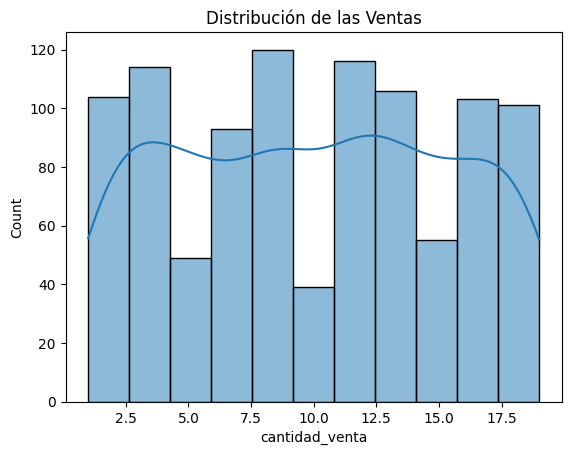

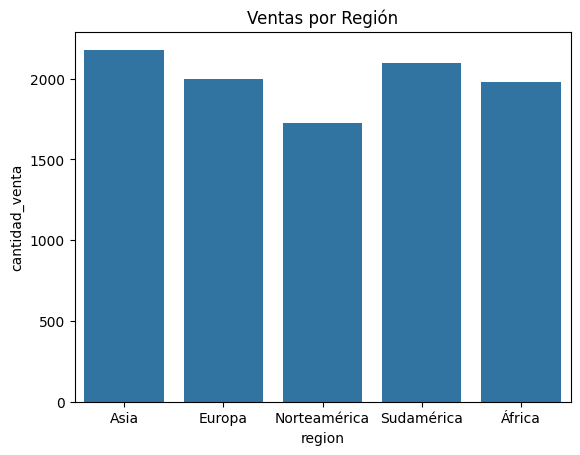

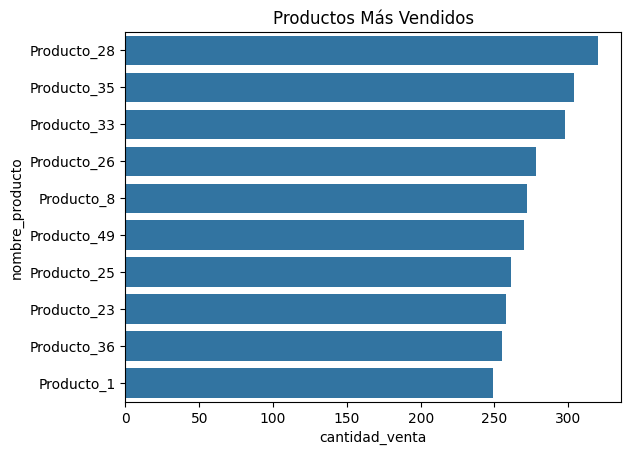

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de las ventas
sns.histplot(ventas_df['cantidad_venta'], kde=True)
plt.title('Distribución de las Ventas')
plt.show()

# Ventas por región
ventas_por_region = ventas_df.groupby('region')['cantidad_venta'].sum().reset_index()
sns.barplot(x='region', y='cantidad_venta', data=ventas_por_region)
plt.title('Ventas por Región')
plt.show()

# Productos más vendidos
productos_mas_vendidos = ventas_df.groupby('producto_id')['cantidad_venta'].sum().nlargest(10).reset_index()
productos_mas_vendidos = productos_mas_vendidos.merge(productos_df, on='producto_id')
sns.barplot(x='cantidad_venta', y='nombre_producto', data=productos_mas_vendidos)
plt.title('Productos Más Vendidos')
plt.show()


In [245]:
# Mostrar las primeras filas del DataFrame
print(ventas_df.head())

   venta_id  producto_id  cliente_id fecha_venta  cantidad_venta  \
0         1           39         121  2023-05-03              10   
1         2           29          33  2023-01-09              16   
2         3           15         181  2023-09-19              16   
3         4           43         150  2023-03-14              10   
4         5            8          21  2023-12-25              13   

   precio_unitario        region  revenue  
0           227.74          Asia  2277.40  
1           145.02        Europa  2320.32  
2           314.80        Europa  5036.80  
3           496.30    Sudamérica  4963.00  
4           199.30  Norteamérica  2590.90  


In [246]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Preparar los datos para el modelo
X = ventas_df[['venta_id','producto_id','cliente_id','precio_unitario']]
y = ventas_df['revenue']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Error Medio Absoluto: {mae}')


Error Medio Absoluto: 1322.5425169999996


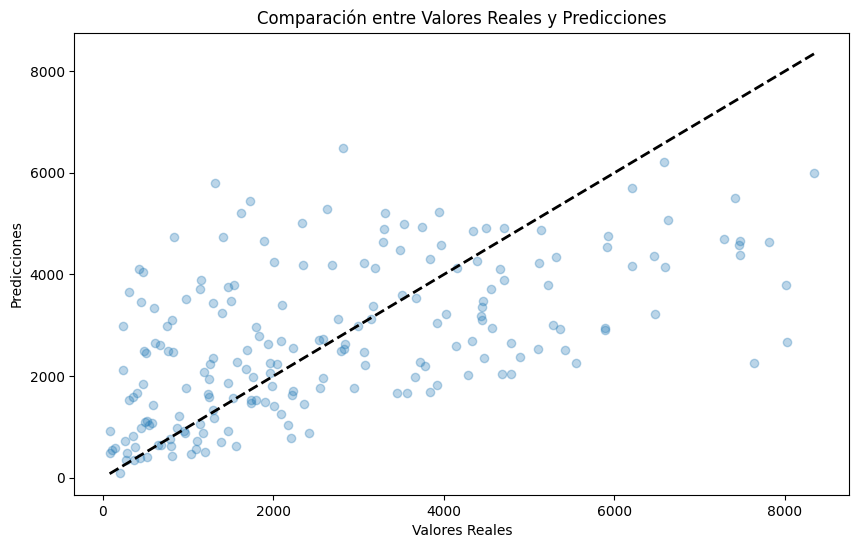

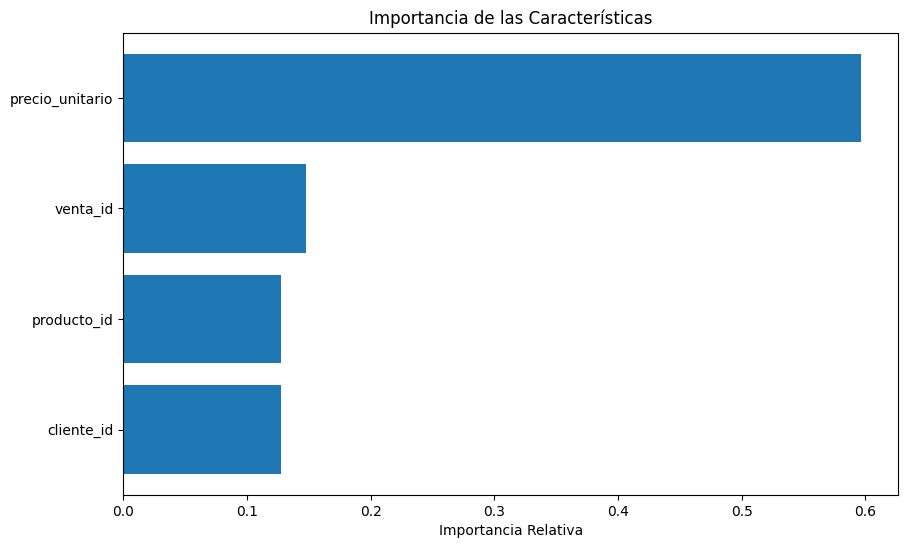

In [247]:
# Comparar los valores reales con las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.show()

# Visualizar la importancia de las características
importances = modelo.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Importancia de las Características')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()


     cliente_id nombre_cliente   revenue
193         194    Cliente_194  33605.64
61           62     Cliente_62  32426.22
178         179    Cliente_179  31587.26
97           98     Cliente_98  30426.38
119         120    Cliente_120  29143.56
28           29     Cliente_29  29080.46
144         145    Cliente_145  27856.71
62           63     Cliente_63  27432.53
36           37     Cliente_37  27339.30
183         184    Cliente_184  26643.49


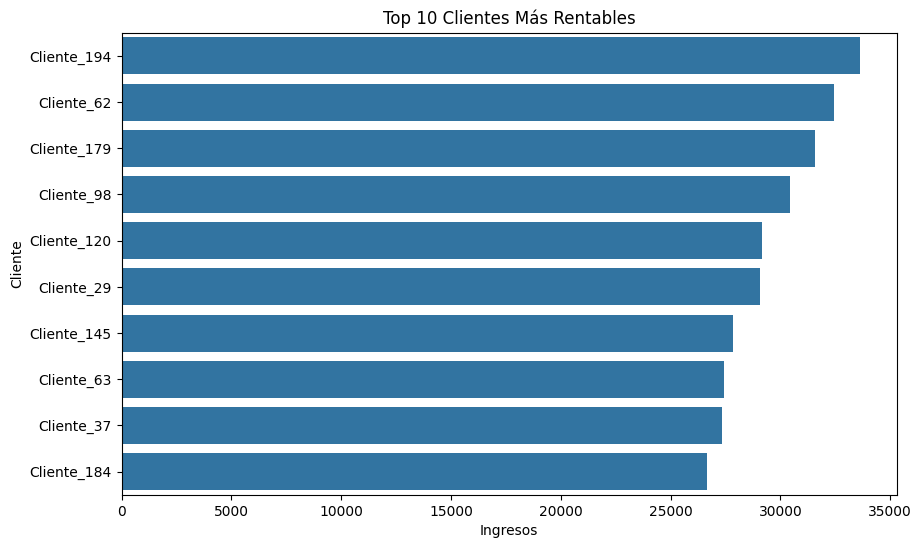

In [248]:
# Analizar ingresos por cliente
ingresos_por_cliente = ventas_merged.groupby('cliente_id')['revenue'].sum().reset_index()
ingresos_por_cliente = ingresos_por_cliente.merge(clientes_df, on='cliente_id')

# Identificar los 10 clientes más rentables
top_clientes = ingresos_por_cliente.nlargest(10, 'revenue')
print(top_clientes[['cliente_id', 'nombre_cliente', 'revenue']])

# Graficar los ingresos de los 10 clientes más rentables
plt.figure(figsize=(10, 6))
sns.barplot(x='revenue', y='nombre_cliente', data=top_clientes)
plt.title('Top 10 Clientes Más Rentables')
plt.xlabel('Ingresos')
plt.ylabel('Cliente')
plt.show()


    producto_id nombre_producto   revenue
24           25     Producto_25  93421.40
27           28     Producto_28  90523.72
32           33     Producto_33  89607.29
48           49     Producto_49  81323.05
34           35     Producto_35  77524.39
25           26     Producto_26  71783.66
7             8      Producto_8  67707.81
22           23     Producto_23  67133.07
0             1      Producto_1  65799.13
46           47     Producto_47  62314.17


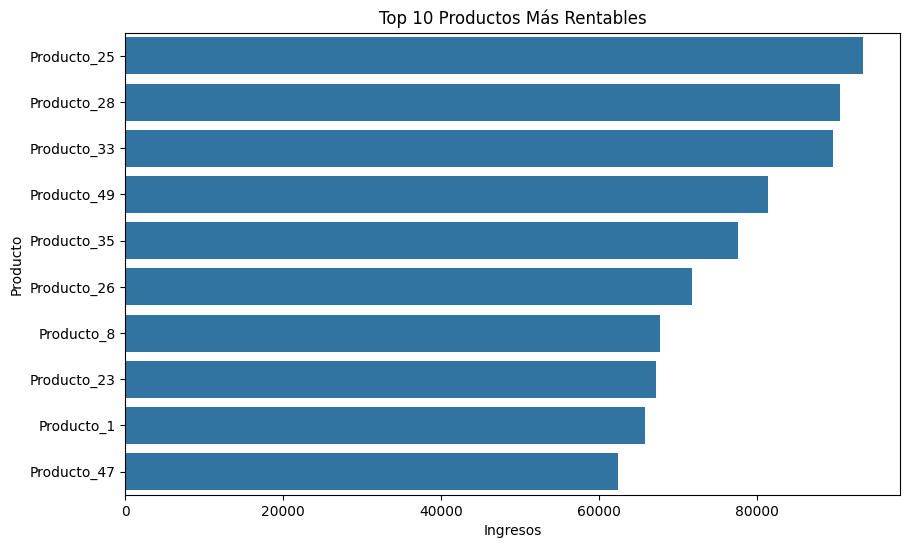

In [249]:
# Analizar ingresos por producto
ingresos_por_producto = ventas_merged.groupby('producto_id')['revenue'].sum().reset_index()
ingresos_por_producto = ingresos_por_producto.merge(productos_df, on='producto_id')

# Identificar los 10 productos más rentables
top_productos = ingresos_por_producto.nlargest(10, 'revenue')
print(top_productos[['producto_id', 'nombre_producto', 'revenue']])

# Graficar los ingresos de los 10 productos más rentables
plt.figure(figsize=(10, 6))
sns.barplot(x='revenue', y='nombre_producto', data=top_productos)
plt.title('Top 10 Productos Más Rentables')
plt.xlabel('Ingresos')
plt.ylabel('Producto')
plt.show()


    producto_id nombre_producto   revenue
24           25     Producto_25  93421.40
27           28     Producto_28  90523.72
32           33     Producto_33  89607.29
48           49     Producto_49  81323.05
34           35     Producto_35  77524.39
25           26     Producto_26  71783.66
7             8      Producto_8  67707.81
22           23     Producto_23  67133.07
0             1      Producto_1  65799.13
46           47     Producto_47  62314.17


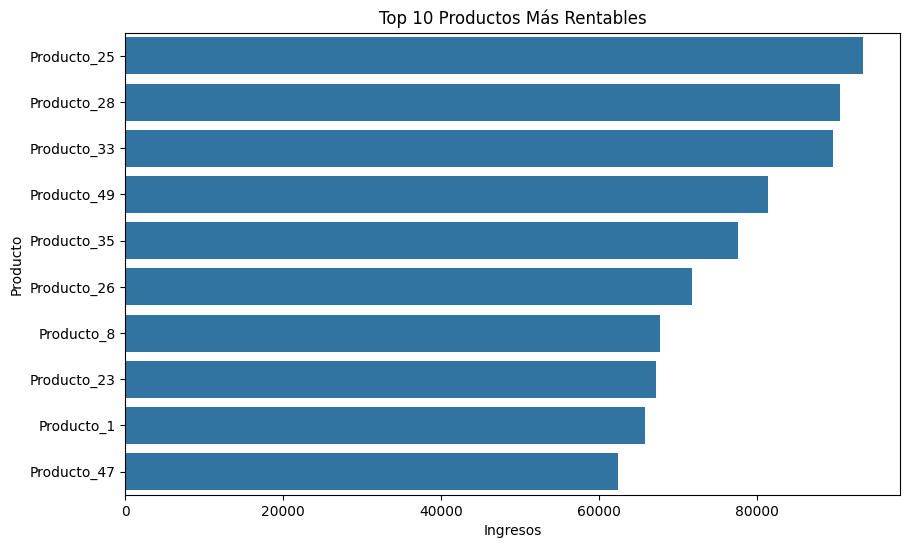

In [250]:
# Analizar ingresos por producto
ingresos_por_producto = ventas_merged.groupby('producto_id')['revenue'].sum().reset_index()
ingresos_por_producto = ingresos_por_producto.merge(productos_df, on='producto_id')

# Identificar los 10 productos más rentables
top_productos = ingresos_por_producto.nlargest(10, 'revenue')
print(top_productos[['producto_id', 'nombre_producto', 'revenue']])

# Graficar los ingresos de los 10 productos más rentables
plt.figure(figsize=(10, 6))
sns.barplot(x='revenue', y='nombre_producto', data=top_productos)
plt.title('Top 10 Productos Más Rentables')
plt.xlabel('Ingresos')
plt.ylabel('Producto')
plt.show()


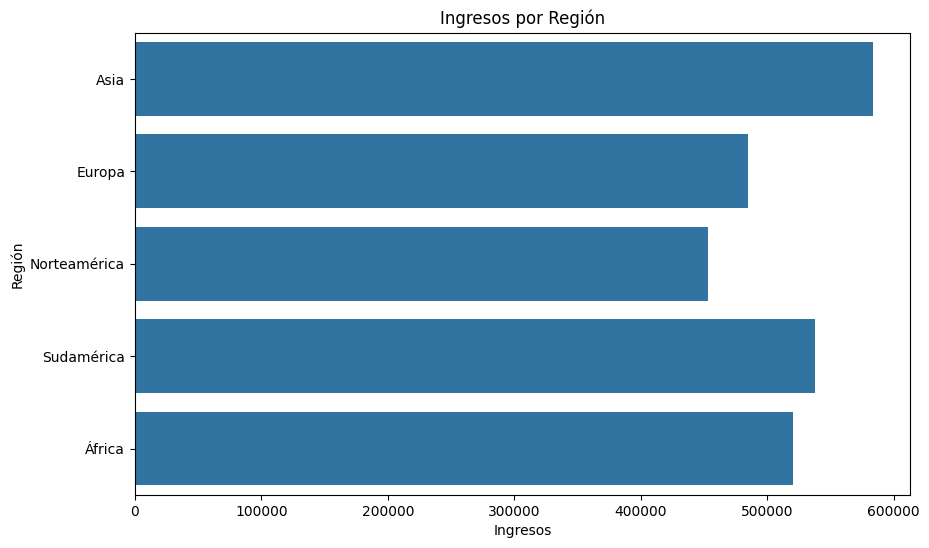

In [251]:
# Analizar ingresos por región
ingresos_por_region = ventas_merged.groupby('region')['revenue'].sum().reset_index()

# Graficar ingresos por región
plt.figure(figsize=(10, 6))
sns.barplot(x='revenue', y='region', data=ingresos_por_region)
plt.title('Ingresos por Región')
plt.xlabel('Ingresos')
plt.ylabel('Región')
plt.show()


In [261]:
ventas_merged_actualizado = pd.DataFrame({
    'revenue': [100, 200, 300, 400],
    'cliente_id': [1, 2, 2, 3],
    'cantidad_venta': [1, 2, 2, 1]
})

# Suponiendo que tienes una función para calcular KPIs
def calcular_kpis(ventas_merged):
    kpis = {}
    kpis['ingresos_totales'] = ventas_merged['revenue'].sum()
    kpis['ingresos_promedio_por_cliente'] = ventas_merged.groupby('cliente_id')['revenue'].sum().mean()
    kpis['productos_vendidos_totales'] = ventas_merged['cantidad_venta'].sum()
    return kpis

# Calcular KPIs antes y después de implementar estrategias
kpis_antes = calcular_kpis(ventas_merged)
# ... implementar estrategias ...
# Actualizar datos de ventas y calcular nuevamente
kpis_despues = calcular_kpis(ventas_merged_actualizado)

# Comparar KPIs
print(f"KPIs antes: {kpis_antes}")
print(f"KPIs después: {kpis_despues}")


KPIs antes: {'ingresos_totales': 2579331.0700000003, 'ingresos_promedio_por_cliente': 12896.65535, 'productos_vendidos_totales': 9976}
KPIs después: {'ingresos_totales': 1000, 'ingresos_promedio_por_cliente': 333.3333333333333, 'productos_vendidos_totales': 6}


In [262]:
# Suponiendo que tienes una función para calcular KPIs
def calcular_kpis(ventas_merged):
    kpis = {}
    kpis['ingresos_totales'] = ventas_merged['revenue'].sum()
    kpis['ingresos_promedio_por_cliente'] = ventas_merged.groupby('cliente_id')['revenue'].sum().mean()
    kpis['productos_vendidos_totales'] = ventas_merged['cantidad_venta'].sum()
    return kpis

# Definir la función implementar_estrategias
def implementar_estrategias(ventas_merged):
    # Aquí es donde implementarías tus estrategias
    # Por ahora, solo devolveremos el DataFrame sin cambios
    return ventas_merged

# Calcular KPIs antes y después de implementar estrategias
kpis_antes = calcular_kpis(ventas_merged)

# Implementar estrategias y actualizar ventas_merged
ventas_merged_actualizado = implementar_estrategias(ventas_merged)

# Calcular nuevamente los KPIs
kpis_despues = calcular_kpis(ventas_merged_actualizado)

# Comparar KPIs
print(f"KPIs antes: {kpis_antes}")
print(f"KPIs después: {kpis_despues}")

KPIs antes: {'ingresos_totales': 2579331.0700000003, 'ingresos_promedio_por_cliente': 12896.65535, 'productos_vendidos_totales': 9976}
KPIs después: {'ingresos_totales': 2579331.0700000003, 'ingresos_promedio_por_cliente': 12896.65535, 'productos_vendidos_totales': 9976}


In [263]:
# Suponiendo que tienes una función para calcular KPIs
def calcular_kpis(ventas_merged):
    kpis = {}
    kpis['ingresos_totales'] = ventas_merged['revenue'].sum()
    kpis['ingresos_promedio_por_cliente'] = ventas_merged.groupby('cliente_id')['revenue'].sum().mean()
    kpis['productos_vendidos_totales'] = ventas_merged['cantidad_venta'].sum()
    return kpis

# Calcular KPIs antes y después de implementar estrategias
kpis_antes = calcular_kpis(ventas_merged)
# ... implementar estrategias ...
# Actualizar datos de ventas y calcular nuevamente
kpis_despues = calcular_kpis(ventas_merged_actualizado)

# Comparar KPIs
print(f"KPIs antes: {kpis_antes}")
print(f"KPIs después: {kpis_despues}")


KPIs antes: {'ingresos_totales': 2579331.0700000003, 'ingresos_promedio_por_cliente': 12896.65535, 'productos_vendidos_totales': 9976}
KPIs después: {'ingresos_totales': 2579331.0700000003, 'ingresos_promedio_por_cliente': 12896.65535, 'productos_vendidos_totales': 9976}


In [264]:
# Suponiendo que tienes una función para calcular KPIs
def calcular_kpis(ventas_merged):
    kpis = {}
    kpis['ingresos_totales'] = ventas_merged['revenue'].sum()
    kpis['ingresos_promedio_por_cliente'] = ventas_merged.groupby('cliente_id')['revenue'].sum().mean()
    kpis['productos_vendidos_totales'] = ventas_merged['cantidad_venta'].sum()
    return kpis

# Calcular KPIs antes y después de implementar estrategias
kpis_antes = calcular_kpis(ventas_merged)

# ... implementar estrategias ...

# Supongamos que las estrategias afectan a las ventas, por lo que actualizamos ventas_merged
ventas_merged_actualizado = implementar_estrategias(ventas_merged)

# Calcular nuevamente los KPIs
kpis_despues = calcular_kpis(ventas_merged_actualizado)

# Comparar KPIs
print(f"KPIs antes: {kpis_antes}")
print(f"KPIs después: {kpis_despues}")

KPIs antes: {'ingresos_totales': 2579331.0700000003, 'ingresos_promedio_por_cliente': 12896.65535, 'productos_vendidos_totales': 9976}
KPIs después: {'ingresos_totales': 2579331.0700000003, 'ingresos_promedio_por_cliente': 12896.65535, 'productos_vendidos_totales': 9976}


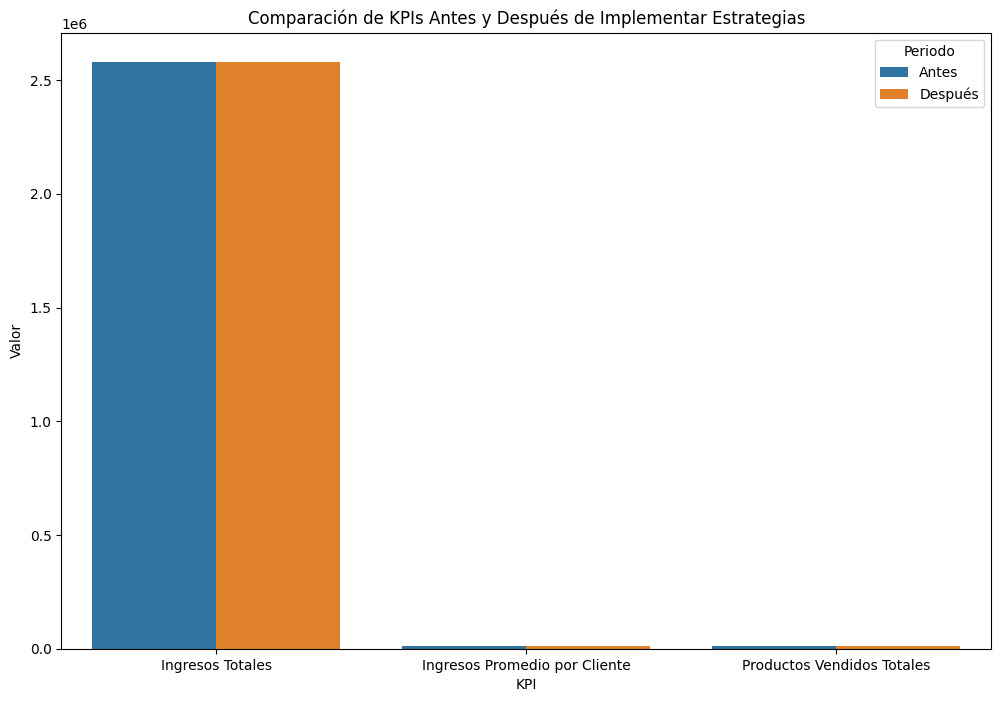

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos para graficar
kpis_df = pd.DataFrame({
    'KPI': ['Ingresos Totales', 'Ingresos Promedio por Cliente', 'Productos Vendidos Totales'],
    'Antes': [kpis_antes['ingresos_totales'], kpis_antes['ingresos_promedio_por_cliente'], kpis_antes['productos_vendidos_totales']],
    'Después': [kpis_despues['ingresos_totales'], kpis_despues['ingresos_promedio_por_cliente'], kpis_despues['productos_vendidos_totales']]
})

# Convertir a formato largo para seaborn
kpis_long_df = kpis_df.melt(id_vars='KPI', value_vars=['Antes', 'Después'], var_name='Periodo', value_name='Valor')

# Graficar los KPIs antes y después
plt.figure(figsize=(12, 8))
sns.barplot(x='KPI', y='Valor', hue='Periodo', data=kpis_long_df)
plt.title('Comparación de KPIs Antes y Después de Implementar Estrategias')
plt.xlabel('KPI')
plt.ylabel('Valor')
plt.show()


C:\Users\yairk\AppData\Local\Temp\ipykernel_4060\3459614657.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ingresos_mensuales = ventas_df.set_index('fecha_venta').resample('M')['revenue'].sum()


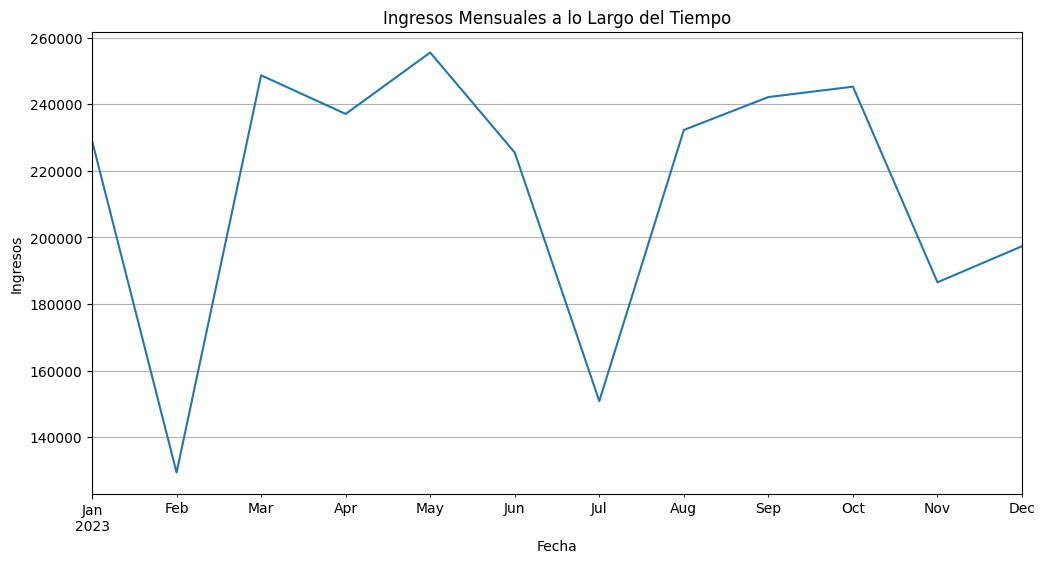

In [266]:
# Convertir 'fecha_venta' a datetime
ventas_df['fecha_venta'] = pd.to_datetime(ventas_df['fecha_venta'])

# Agrupar ingresos por mes
ingresos_mensuales = ventas_df.set_index('fecha_venta').resample('M')['revenue'].sum()

# Graficar serie temporal
plt.figure(figsize=(12, 6))
ingresos_mensuales.plot()
plt.title('Ingresos Mensuales a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()


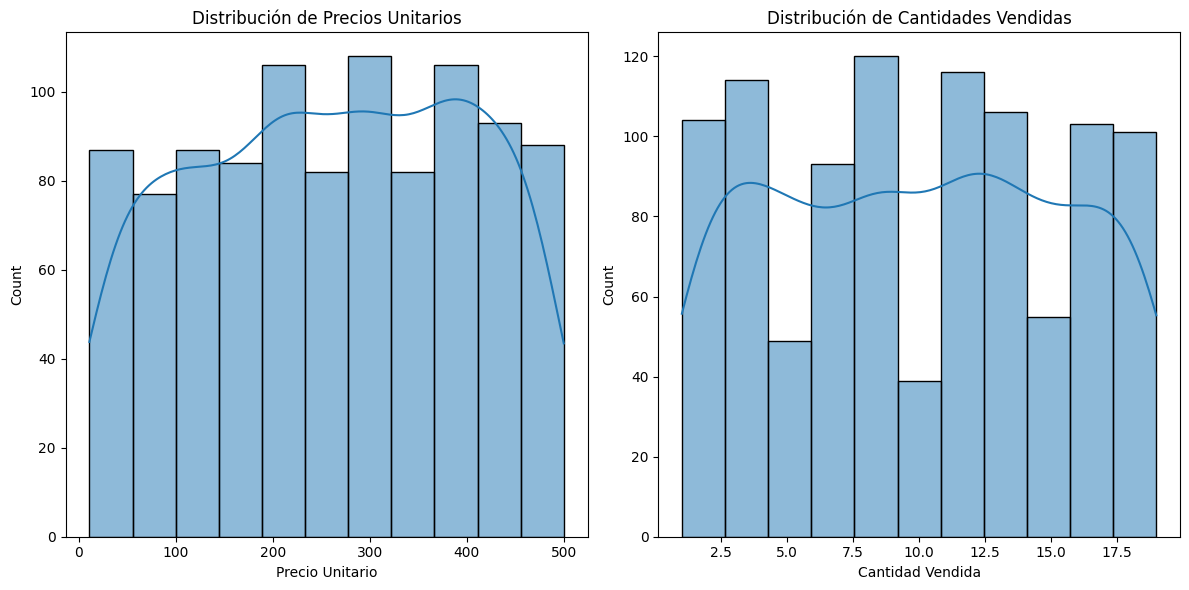

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


ventas_df = pd.read_csv('ventas.csv')


plt.figure(figsize=(12, 6))

# Distribución de precios unitarios
plt.subplot(1, 2, 1)
sns.histplot(ventas_df['precio_unitario'], kde=True)
plt.title('Distribución de Precios Unitarios')
plt.xlabel('Precio Unitario')

# Distribución de cantidades vendidas
plt.subplot(1, 2, 2)
sns.histplot(ventas_df['cantidad_venta'], kde=True)
plt.title('Distribución de Cantidades Vendidas')
plt.xlabel('Cantidad Vendida')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

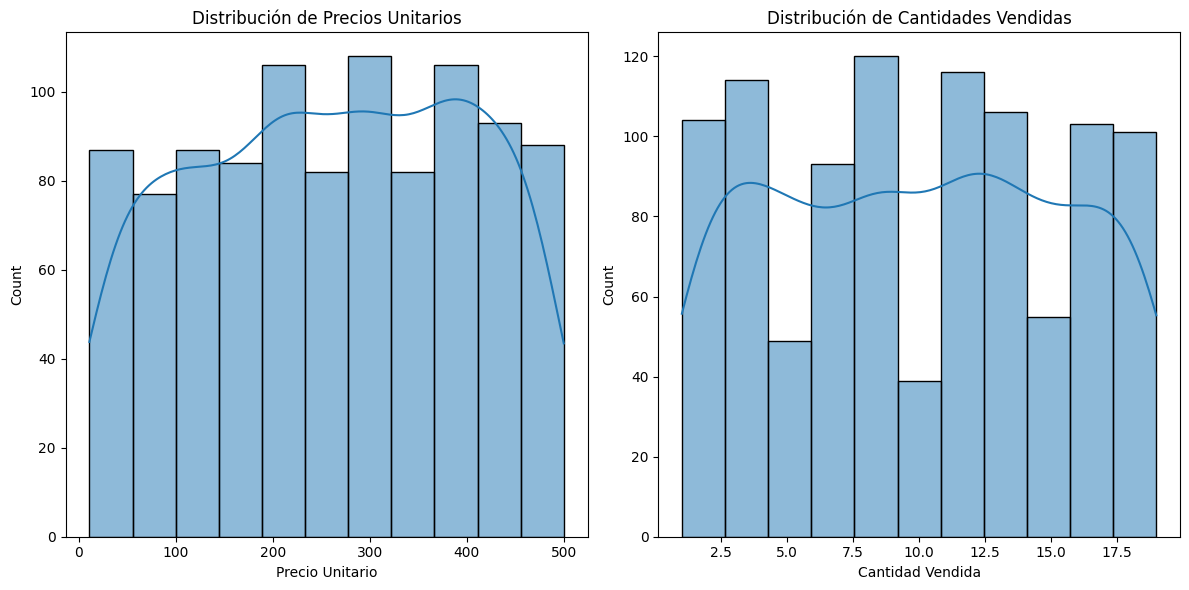

In [268]:
ventas_df = pd.read_csv('ventas.csv')
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.figure(figsize=(12, 6))
# rest of your code

import seaborn as sns

# Distribución de precios unitarios
plt.subplot(1, 2, 1)
sns.histplot(ventas_df['precio_unitario'], kde=True)
plt.title('Distribución de Precios Unitarios')
plt.xlabel('Precio Unitario')

import pandas as pd

# Assuming your sales data is in a CSV file named 'ventas.csv'
ventas_df = pd.read_csv('ventas.csv')

# Distribución de cantidades vendidas
plt.subplot(1, 2, 2)
sns.histplot(ventas_df['cantidad_venta'], kde=True)
plt.title('Distribución de Cantidades Vendidas')
plt.xlabel('Cantidad Vendida')

plt.tight_layout()
plt.show()


C:\Users\yairk\AppData\Local\Temp\ipykernel_4060\3459614657.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ingresos_mensuales = ventas_df.set_index('fecha_venta').resample('M')['revenue'].sum()


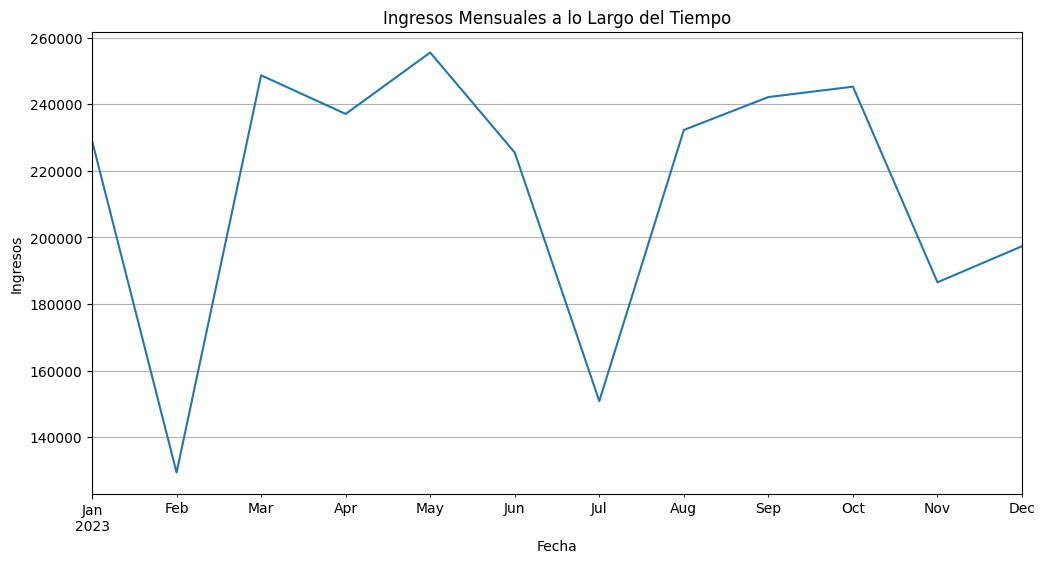

In [269]:
# Convertir 'fecha_venta' a datetime
ventas_df['fecha_venta'] = pd.to_datetime(ventas_df['fecha_venta'])

# Agrupar ingresos por mes
ingresos_mensuales = ventas_df.set_index('fecha_venta').resample('M')['revenue'].sum()

# Graficar serie temporal
plt.figure(figsize=(12, 6))
ingresos_mensuales.plot()
plt.title('Ingresos Mensuales a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()


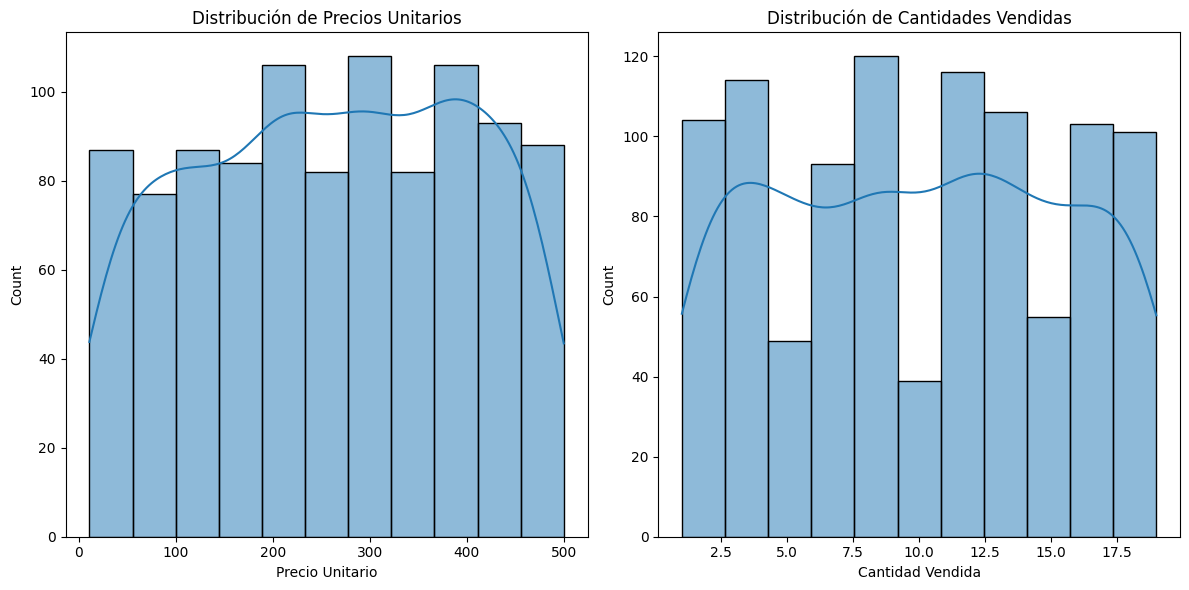

In [270]:
plt.figure(figsize=(12, 6))

# Distribución de precios unitarios
plt.subplot(1, 2, 1)
sns.histplot(ventas_df['precio_unitario'], kde=True)
plt.title('Distribución de Precios Unitarios')
plt.xlabel('Precio Unitario')

# Distribución de cantidades vendidas
plt.subplot(1, 2, 2)
sns.histplot(ventas_df['cantidad_venta'], kde=True)
plt.title('Distribución de Cantidades Vendidas')
plt.xlabel('Cantidad Vendida')

plt.tight_layout()
plt.show()


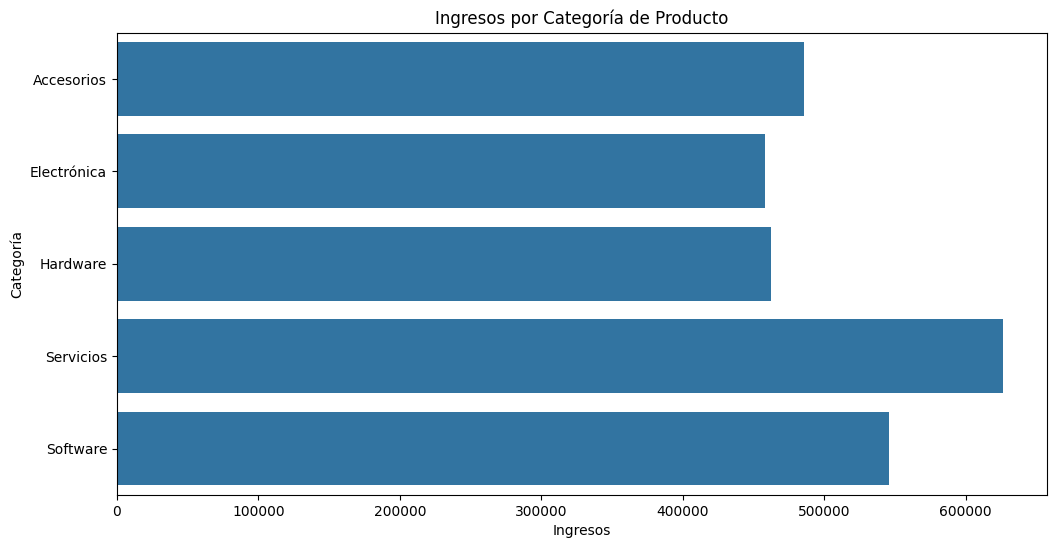

In [271]:
# Unir datos de productos
ventas_con_productos = ventas_df.merge(productos_df, on='producto_id')

# Agrupar ingresos por categoría
ingresos_por_categoria = ventas_con_productos.groupby('categoria')['revenue'].sum().reset_index()

# Graficar ingresos por categoría
plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='categoria', data=ingresos_por_categoria)
plt.title('Ingresos por Categoría de Producto')
plt.xlabel('Ingresos')
plt.ylabel('Categoría')
plt.show()


In [272]:
numeric_ventas_df = ventas_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_ventas_df.corr()

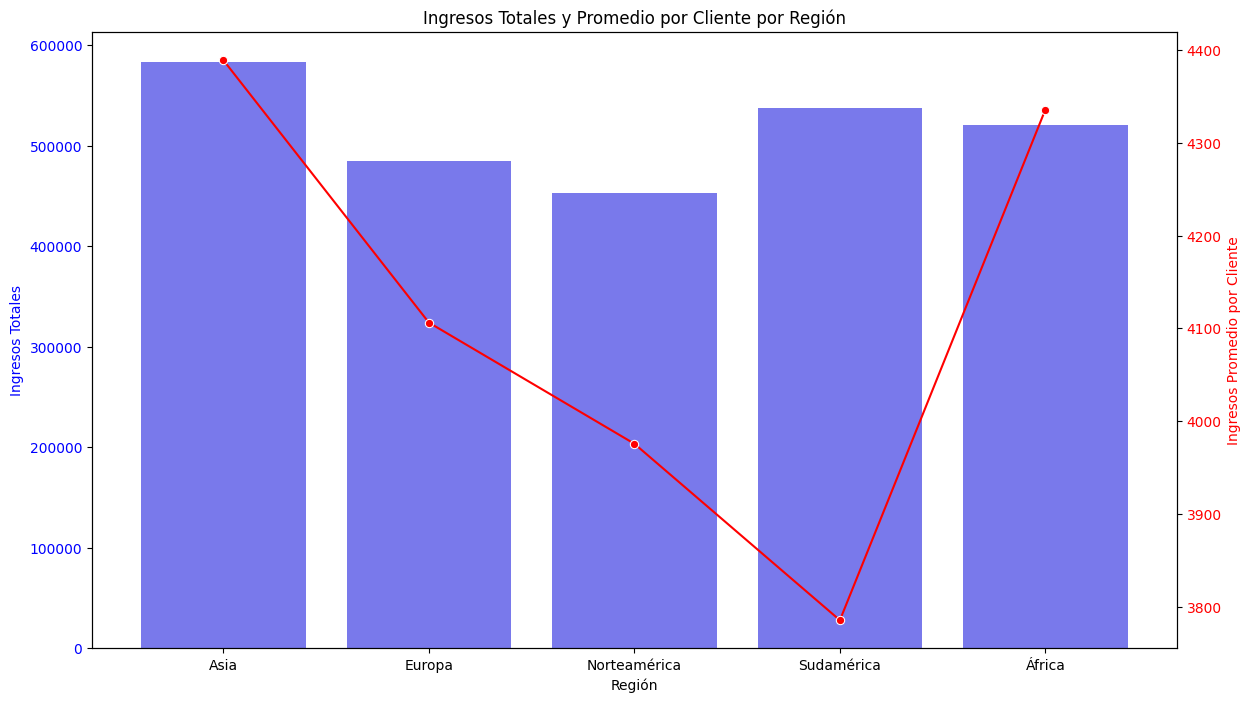

In [273]:
# Agrupar ingresos por región y cliente
ingresos_por_region_cliente = ventas_con_productos.groupby(['region', 'cliente_id'])['revenue'].sum().reset_index()

# Promedio de ingresos por cliente en cada región
promedio_ingresos_por_region = ingresos_por_region_cliente.groupby('region')['revenue'].mean().reset_index()

# Total de ingresos por región
total_ingresos_por_region = ingresos_por_region_cliente.groupby('region')['revenue'].sum().reset_index()

# Graficar
fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(x='region', y='revenue', data=total_ingresos_por_region, ax=ax1, alpha=0.6, color='b')
ax1.set_xlabel('Región')
ax1.set_ylabel('Ingresos Totales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
sns.lineplot(x='region', y='revenue', data=promedio_ingresos_por_region, ax=ax2, marker='o', color='r')
ax2.set_ylabel('Ingresos Promedio por Cliente', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Ingresos Totales y Promedio por Cliente por Región')
plt.show()


C:\Users\yairk\AppData\Local\Temp\ipykernel_4060\3992821356.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='segmento', data=clientes_segmentados, palette='viridis')


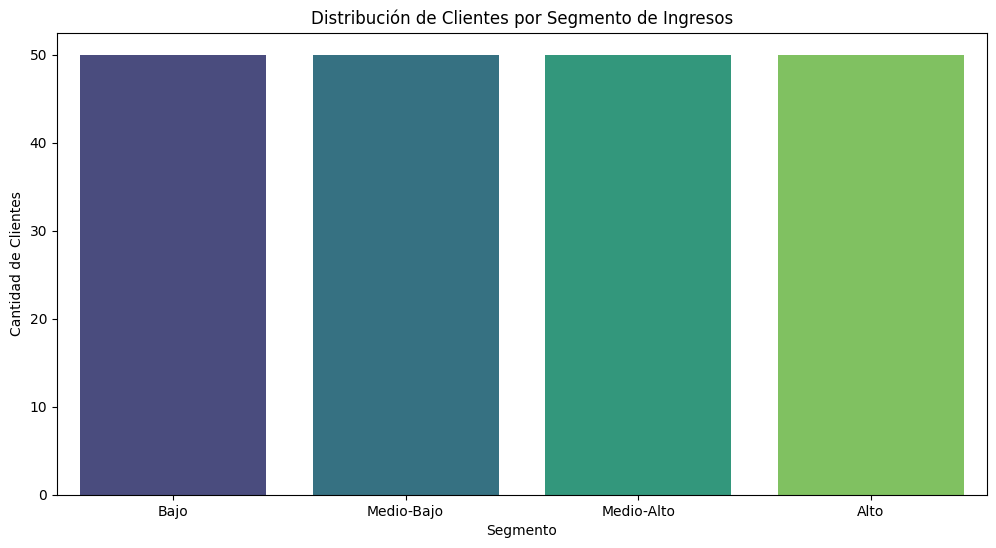

C:\Users\yairk\AppData\Local\Temp\ipykernel_4060\3992821356.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ingresos_promedio_por_segmento = clientes_segmentados.groupby('segmento')['revenue'].mean().reset_index()
C:\Users\yairk\AppData\Local\Temp\ipykernel_4060\3992821356.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segmento', y='revenue', data=ingresos_promedio_por_segmento, palette='viridis')


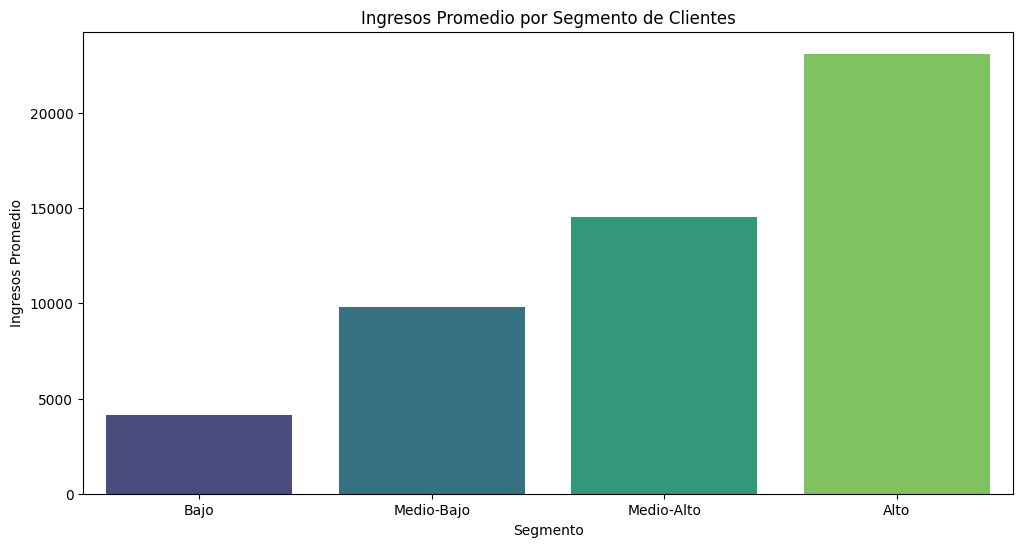

In [274]:
# Crear segmentos de clientes basados en ingresos
ingresos_por_cliente = ventas_df.groupby('cliente_id')['revenue'].sum().reset_index()
ingresos_por_cliente['segmento'] = pd.qcut(ingresos_por_cliente['revenue'], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Unir con datos de clientes
clientes_segmentados = ingresos_por_cliente.merge(clientes_df, on='cliente_id')

# Graficar la distribución de clientes por segmento
plt.figure(figsize=(12, 6))
sns.countplot(x='segmento', data=clientes_segmentados, palette='viridis')
plt.title('Distribución de Clientes por Segmento de Ingresos')
plt.xlabel('Segmento')
plt.ylabel('Cantidad de Clientes')
plt.show()

# Graficar ingresos promedio por segmento
ingresos_promedio_por_segmento = clientes_segmentados.groupby('segmento')['revenue'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='segmento', y='revenue', data=ingresos_promedio_por_segmento, palette='viridis')
plt.title('Ingresos Promedio por Segmento de Clientes')
plt.xlabel('Segmento')
plt.ylabel('Ingresos Promedio')
plt.show()


In [275]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generar datos de ventas simulados
np.random.seed(42)
num_ventas = 1000
producto_ids = range(1, 51)
cliente_ids = range(1, 201)
fechas_ventas = [datetime(2023, 1, 1) + timedelta(days=np.random.randint(0, 365)) for _ in range(num_ventas)]

# Datos originales de ventas
ventas_df = pd.DataFrame({
    'venta_id': range(1, num_ventas + 1),
    'producto_id': np.random.choice(producto_ids, num_ventas),
    'cliente_id': np.random.choice(cliente_ids, num_ventas),
    'fecha_venta': fechas_ventas,
    'cantidad_venta': np.random.randint(1, 10, num_ventas),
    'precio_unitario': np.random.uniform(10, 1000, num_ventas).round(2)
})

# Añadir columna de ingresos
ventas_df['revenue'] = ventas_df['cantidad_venta'] * ventas_df['precio_unitario']

# Simular ventas después de las estrategias
ventas_despues = ventas_df.copy()
ventas_despues['fecha_venta'] = [fecha + timedelta(days=365) for fecha in ventas_despues['fecha_venta']]
ventas_despues['revenue'] *= 1.1  # Simulando un aumento del 10% en los ingresos

# Unir ambos DataFrames para tener un conjunto continuo
ventas_totales = pd.concat([ventas_df, ventas_despues])

# Mostrar algunas filas para verificar
print(ventas_totales.head())
print(ventas_totales.tail())


   venta_id  producto_id  cliente_id fecha_venta  cantidad_venta  \
0         1           43         189  2023-04-13               3   
1         2            3          93  2023-12-15               5   
2         3           33         182  2023-09-28               5   
3         4            6         191  2023-04-17               4   
4         5           50          97  2023-03-13               1   

   precio_unitario  revenue  
0            67.13   201.39  
1           449.92  2249.60  
2           282.79  1413.95  
3           625.82  2503.28  
4           992.52   992.52  
     venta_id  producto_id  cliente_id fecha_venta  cantidad_venta  \
995       996           41          51  2024-02-07               3   
996       997            3         147  2024-10-19               4   
997       998           28         170  2024-05-18               4   
998       999           10          35  2024-12-21               5   
999      1000           35          46  2024-11-28           

In [276]:
def calcular_kpis(df):
    # Calculate KPIs here
    ingresos_totales = df['precio_unitario'].sum()
    ingresos_promedio_por_cliente = df['precio_unitario'].mean()
    productos_vendidos_totales = df['cantidad_venta'].sum()

    return {
        'ingresos_totales': ingresos_totales,
        'ingresos_promedio_por_cliente': ingresos_promedio_por_cliente,
        'productos_vendidos_totales': productos_vendidos_totales
    }

In [277]:
# Función para calcular y graficar KPIs
def graficar_kpis(ventas_df_antes, ventas_df_despues):
    kpis_antes = calcular_kpis(ventas_df_antes)
    kpis_despues = calcular_kpis(ventas_df_despues)

    kpis_df = pd.DataFrame({
        'KPI': ['Ingresos Totales', 'Ingresos Promedio por Cliente', 'Productos Vendidos Totales'],
        'Antes': [kpis_antes['ingresos_totales'], kpis_antes['ingresos_promedio_por_cliente'], kpis_antes['productos_vendidos_totales']],
        'Después': [kpis_despues['ingresos_totales'], kpis_despues['ingresos_promedio_por_cliente'], kpis_despues['productos_vendidos_totales']]
    })

    kpis_long_df = kpis_df.melt(id_vars='KPI', value_vars=['Antes', 'Después'], var_name='Periodo', value_name='Valor')

    plt.figure(figsize=(12, 8))
    sns.barplot(x='KPI', y='Valor', hue='Periodo', data=kpis_long_df)
    plt.title('Comparación de KPIs Antes y Después de Implementar Estrategias')
    plt.xlabel('KPI')
    plt.ylabel('Valor')
    plt.show()




In [278]:
# Función para calcular KPIs
def calcular_kpis(ventas_df):
    kpis = {}
    kpis['ingresos_totales'] = ventas_df['revenue'].sum()
    kpis['ingresos_promedio_por_cliente'] = ventas_df.groupby('cliente_id')['revenue'].sum().mean()
    kpis['productos_vendidos_totales'] = ventas_df['cantidad_venta'].sum()
    return kpis

# Dividir las ventas en dos periodos: antes y después de la implementación
fecha_corte = datetime(2024, 1, 1)
ventas_antes = ventas_totales[ventas_totales['fecha_venta'] < fecha_corte]
ventas_despues = ventas_totales[ventas_totales['fecha_venta'] >= fecha_corte]

# Calcular KPIs antes y después
kpis_antes = calcular_kpis(ventas_antes)
kpis_despues = calcular_kpis(ventas_despues)

# Mostrar KPIs
print(f"KPIs antes: {kpis_antes}")
print(f"KPIs después: {kpis_despues}")


KPIs antes: {'ingresos_totales': 2592467.2, 'ingresos_promedio_por_cliente': 13027.473366834172, 'productos_vendidos_totales': 5040}
KPIs después: {'ingresos_totales': 2851713.92, 'ingresos_promedio_por_cliente': 14330.22070351759, 'productos_vendidos_totales': 5040}


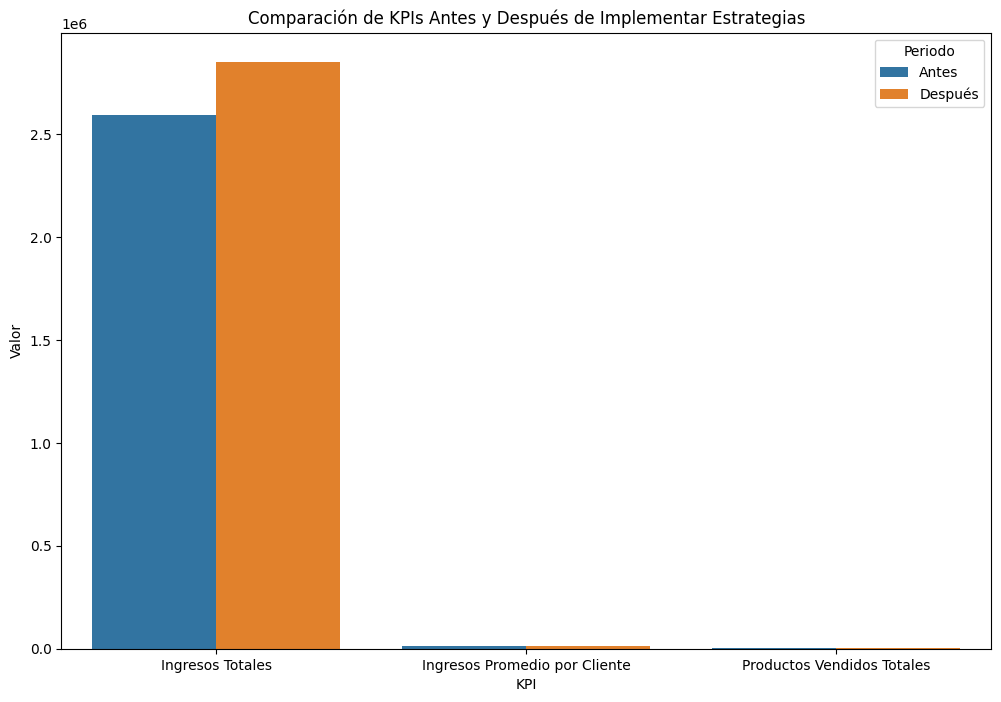

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos para graficar
kpis_df = pd.DataFrame({
    'KPI': ['Ingresos Totales', 'Ingresos Promedio por Cliente', 'Productos Vendidos Totales'],
    'Antes': [kpis_antes['ingresos_totales'], kpis_antes['ingresos_promedio_por_cliente'], kpis_antes['productos_vendidos_totales']],
    'Después': [kpis_despues['ingresos_totales'], kpis_despues['ingresos_promedio_por_cliente'], kpis_despues['productos_vendidos_totales']]
})

# Convertir a formato largo para seaborn
kpis_long_df = kpis_df.melt(id_vars='KPI', value_vars=['Antes', 'Después'], var_name='Periodo', value_name='Valor')

# Graficar los KPIs antes y después
plt.figure(figsize=(12, 8))
sns.barplot(x='KPI', y='Valor', hue='Periodo', data=kpis_long_df)
plt.title('Comparación de KPIs Antes y Después de Implementar Estrategias')
plt.xlabel('KPI')
plt.ylabel('Valor')
plt.show()


C:\Users\yairk\AppData\Local\Temp\ipykernel_4060\1507199590.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = ventas_totales.groupby([pd.Grouper(key='fecha_venta', freq='M'), 'periodo'])['revenue'].sum().reset_index()


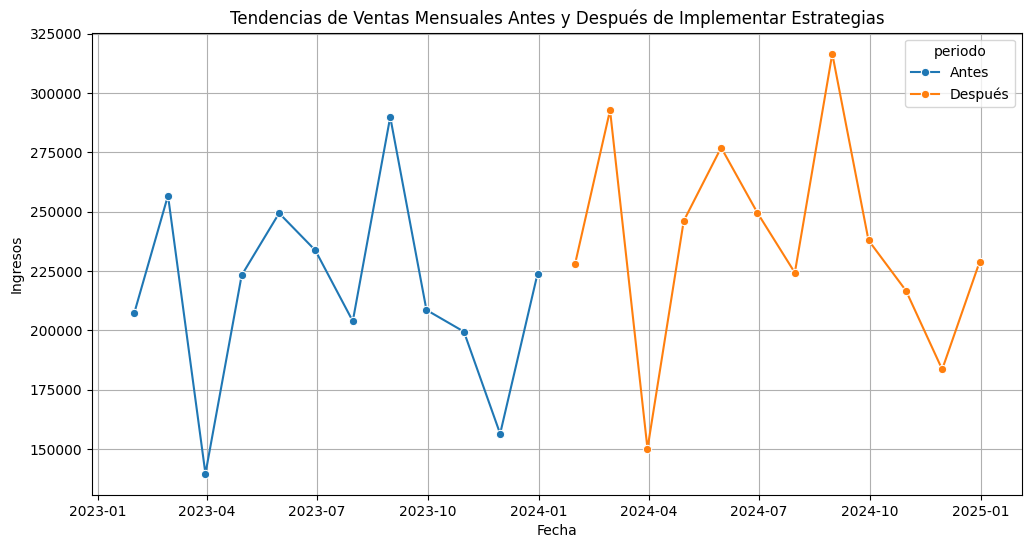

In [280]:
# Graficar tendencias de ventas antes y después
ventas_totales['periodo'] = np.where(ventas_totales['fecha_venta'] < fecha_corte, 'Antes', 'Después')

# Agrupar por mes y periodo
ventas_mensuales = ventas_totales.groupby([pd.Grouper(key='fecha_venta', freq='M'), 'periodo'])['revenue'].sum().reset_index()

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(x='fecha_venta', y='revenue', hue='periodo', data=ventas_mensuales, marker='o')
plt.title('Tendencias de Ventas Mensuales Antes y Después de Implementar Estrategias')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()


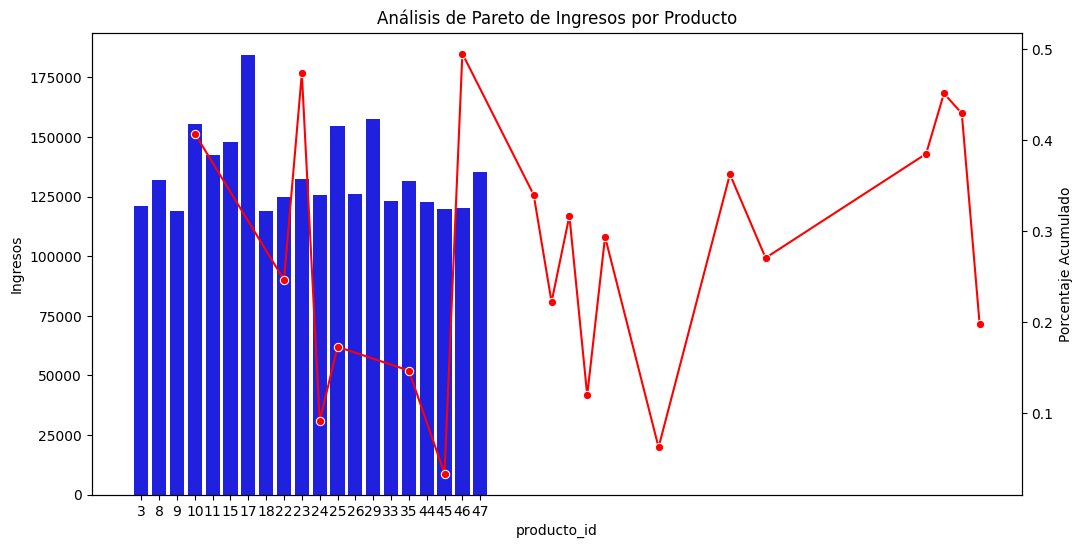

In [281]:
# Ingresos por producto
ingresos_por_producto = ventas_totales.groupby('producto_id')['revenue'].sum().sort_values(ascending=False).reset_index()

# Calcular el porcentaje acumulado
ingresos_por_producto['perc_acumulado'] = ingresos_por_producto['revenue'].cumsum() / ingresos_por_producto['revenue'].sum()

# Graficar Pareto
plt.figure(figsize=(12, 6))
sns.barplot(x='producto_id', y='revenue', data=ingresos_por_producto.head(20), color='b')
plt.ylabel('Ingresos')
plt.twinx()
sns.lineplot(x='producto_id', y='perc_acumulado', data=ingresos_por_producto.head(20), color='r', marker='o')
plt.title('Análisis de Pareto de Ingresos por Producto')
plt.xlabel('Producto ID')
plt.ylabel('Porcentaje Acumulado')
plt.show()


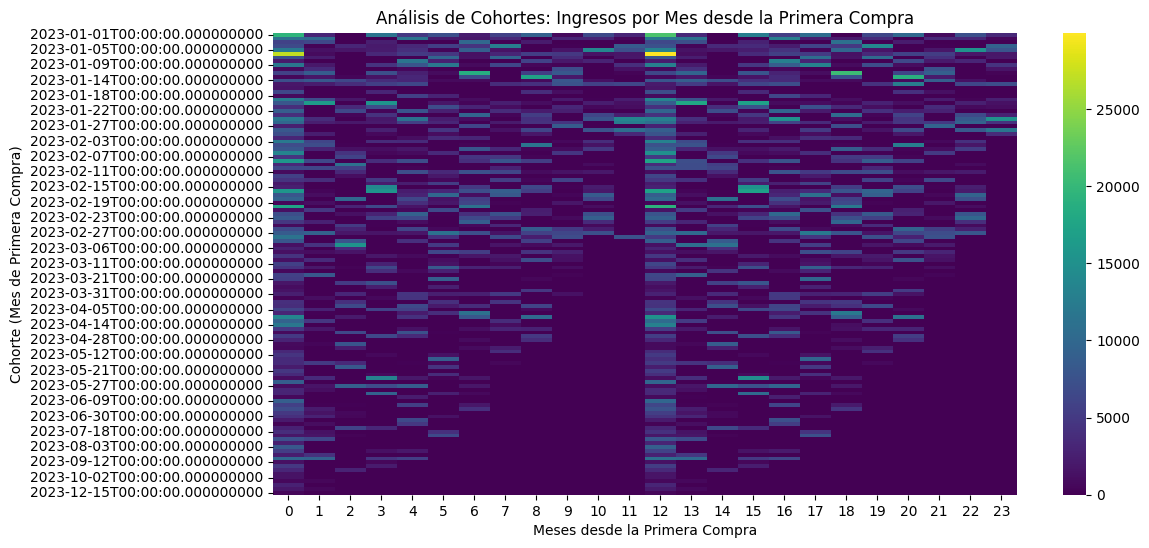

In [282]:
# Crear una columna de cohorte
ventas_totales['cohorte'] = ventas_totales.groupby('cliente_id')['fecha_venta'].transform('min')

# Calcular ingresos por cohorte y mes desde la primera compra
ventas_totales['meses_desde_primera_compra'] = (ventas_totales['fecha_venta'].dt.to_period('M') - ventas_totales['cohorte'].dt.to_period('M')).apply(lambda x: x.n)

# Agrupar por cohorte y meses desde la primera compra
cohortes = ventas_totales.groupby(['cohorte', 'meses_desde_primera_compra'])['revenue'].sum().unstack().fillna(0)

# Graficar análisis de cohortes
plt.figure(figsize=(12, 6))
sns.heatmap(cohortes, cmap='viridis')
plt.title('Análisis de Cohortes: Ingresos por Mes desde la Primera Compra')
plt.xlabel('Meses desde la Primera Compra')
plt.ylabel('Cohorte (Mes de Primera Compra)')
plt.show()


In [283]:
import pandas as pd

df = pd.read_csv('ventas.csv')

if 'region' in df.columns:
    print("Column 'region' is present")
else:
    print("Column 'region' is not present")

if 'region' in ventas_totales.columns:
    print("ventas_totales has a 'region' column")
if 'region' in productos_df.columns:
    print("productos_df has a 'region' column")
if 'region' in clientes_df.columns:
    print("clientes_df has a 'region' column")


if 'region' in ventas_con_productos_clientes.columns:
    print("ventas_con_productos_clientes has a 'region' column")
else:
    print("ventas_con_productos_clientes does not have a 'region' column")

Column 'region' is present
ventas_con_productos_clientes does not have a 'region' column


In [284]:
print(ventas_con_productos_clientes.columns)

Index(['venta_id', 'producto_id', 'cliente_id', 'fecha_venta',
       'cantidad_venta', 'precio_unitario', 'revenue', 'periodo', 'cohorte',
       'meses_desde_primera_compra', 'año_mes', 'nombre_producto', 'categoria',
       'precio_base', 'stock', 'nombre_cliente', 'pais', 'industria',
       'fecha_registro'],
      dtype='object')


In [285]:
if 'region' in ventas_con_productos_clientes.columns:
    ingresos_por_region_producto = ventas_con_productos_clientes.groupby(['region', 'nombre_producto'])['revenue'].sum().unstack().fillna(0)
else:
    print("The 'region' column is missing in ventas_con_productos_clientes DataFrame.")


The 'region' column is missing in ventas_con_productos_clientes DataFrame.


In [286]:
if 'region' in ventas_con_productos_clientes.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='region', y='revenue', data=ventas_con_productos_clientes)
    plt.title('Distribución de Ingresos por Región')
    plt.xlabel('Región')
    plt.ylabel('Ingresos')
    plt.show()
else:
    print("The 'region' column is missing in ventas_con_productos_clientes DataFrame.")


The 'region' column is missing in ventas_con_productos_clientes DataFrame.


C:\Users\yairk\AppData\Local\Temp\ipykernel_4060\713119124.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  retencion = retencion.applymap(lambda x: 1 if x > 0 else 0).cumsum(axis=1)


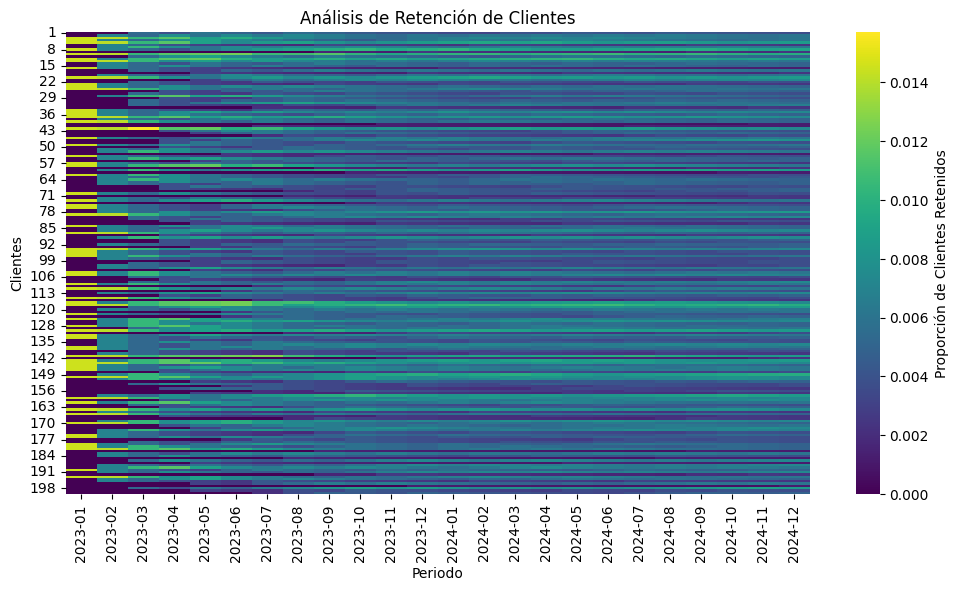

In [287]:
# Crear una columna de año y mes de venta
ventas_totales['año_mes'] = ventas_totales['fecha_venta'].dt.to_period('M')

# Tabla de retención de clientes
retencion = ventas_totales.pivot_table(index='cliente_id', columns='año_mes', values='venta_id', aggfunc='count').fillna(0)
retencion = retencion.applymap(lambda x: 1 if x > 0 else 0).cumsum(axis=1)

# Graficar análisis de retención
retencion = retencion.T
retencion['total_clientes'] = retencion.sum(axis=1)
retencion = retencion.div(retencion['total_clientes'], axis=0)
retencion = retencion.drop(columns=['total_clientes'])

plt.figure(figsize=(12, 6))
sns.heatmap(retencion.T, cmap='viridis', cbar_kws={'label': 'Proporción de Clientes Retenidos'})
plt.title('Análisis de Retención de Clientes')
plt.xlabel('Periodo')
plt.ylabel('Clientes')
plt.show()
